# Problem Statement:
### To classify which stage the HCV affected Patient is in out of 4 stages - 
### 1(F1:Portal Fibrosis), 2(F2:Few Septa), 3(F3:Many Septa), 4(F4:Cirrhosis)

### Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Reading the dataset

In [2]:
df = pd.read_csv("dataset.csv")
df

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,44,1,29,1,2,2,2,1,1,1,...,63,44,45,387795,55938,5,5,5,15,4
1381,55,1,34,1,2,2,1,1,1,1,...,97,64,41,481378,152961,393339,73574,236273,10,2
1382,42,1,26,2,2,1,1,1,2,1,...,87,39,24,612664,572756,806109,343719,160457,6,2
1383,52,1,29,2,1,1,2,2,2,1,...,48,81,43,139872,76161,515730,2460,696074,15,3


In [3]:
print(df.shape)

(1385, 29)


### so, we have 1385 rows and 29 attributes in our dataset.

## Now lets check if there's any missing data or duplicate data.

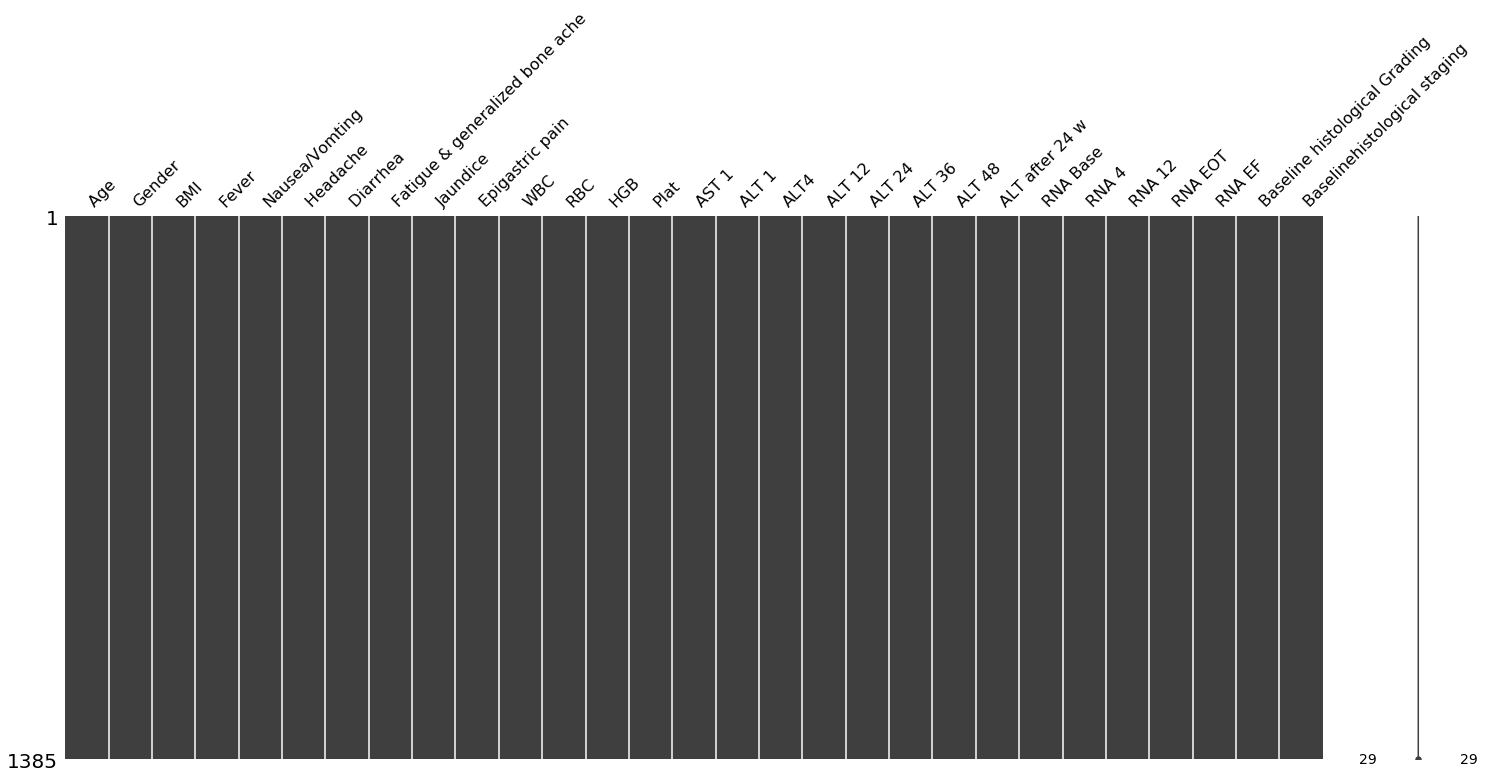

In [4]:
import missingno as msno
msno.matrix(df)
plt.show()

In [5]:
 df.isnull().sum()

Age                                 0
Gender                              0
BMI                                 0
Fever                               0
Nausea/Vomting                      0
Headache                            0
Diarrhea                            0
Fatigue & generalized bone ache     0
Jaundice                            0
Epigastric pain                     0
WBC                                 0
RBC                                 0
HGB                                 0
Plat                                0
AST 1                               0
ALT 1                               0
ALT4                                0
ALT 12                              0
ALT 24                              0
ALT 36                              0
ALT 48                              0
ALT after 24 w                      0
RNA Base                            0
RNA 4                               0
RNA 12                              0
RNA EOT                             0
RNA EF      

In [6]:
df.duplicated().sum()

0

### Now that we dont have any null or missing values, we can move on to the next step

In [7]:
df.dtypes

Age                                   int64
Gender                                int64
BMI                                   int64
Fever                                 int64
Nausea/Vomting                        int64
Headache                              int64
Diarrhea                              int64
Fatigue & generalized bone ache       int64
Jaundice                              int64
Epigastric pain                       int64
WBC                                   int64
RBC                                 float64
HGB                                   int64
Plat                                float64
AST 1                                 int64
ALT 1                                 int64
ALT4                                float64
ALT 12                                int64
ALT 24                                int64
ALT 36                                int64
ALT 48                                int64
ALT after 24 w                        int64
RNA Base                        

### so, we have 26 integer attributes and 3 float attributes.

In [8]:
df.describe()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,...,1385.000000,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000,1385.000000,1385.000000
mean,46.319134,1.489531,28.608664,1.515523,1.502527,1.496029,1.502527,1.498917,1.501083,1.503971,...,83.117690,83.629603,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,287660.336462,291378.290975,9.761733,2.536462
std,8.781506,0.500071,4.076215,0.499939,0.500174,0.500165,0.500174,0.500179,0.500179,0.500165,...,26.399031,26.223955,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,264559.525070,267700.691713,4.023896,1.121392
min,32.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,5.000000,5.000000,3.000000,1.000000
25%,39.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,61.000000,61.000000,28.000000,2.692530e+05,2.708930e+05,5.000000e+00,5.000000,5.000000,6.000000,2.000000
50%,46.000000,1.000000,29.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,...,84.000000,83.000000,34.000000,5.931030e+05,5.978690e+05,2.343590e+05,251376.000000,244049.000000,10.000000,3.000000
75%,54.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,106.000000,106.000000,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,517806.000000,527864.000000,13.000000,4.000000
max,61.000000,2.000000,35.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,128.000000,128.000000,45.000000,1.201086e+06,1.201715e+06,3.731527e+06,808450.000000,810333.000000,16.000000,4.000000


### The above is the statistical analysis of each attribute. From this it is clear that we should scale the data since the algorithms are going to use euclidean distances between two data points in their computations.

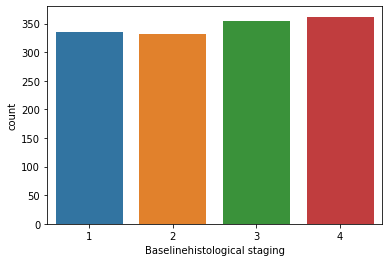

In [9]:
sns.countplot("Baselinehistological staging",data=df)
plt.show()

In [10]:
df['Baselinehistological staging'].value_counts()

4    362
3    355
1    336
2    332
Name: Baselinehistological staging, dtype: int64

### X= input and y= output

In [11]:
X = df.drop(['Baselinehistological staging'],axis=1)
y = df['Baselinehistological staging']

### Spliting in to train and test

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=18)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1108, 28)
(277, 28)
(1108,)
(277,)


### so, we have 1108 rows in train and 277 in test

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling for training data
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
scaled_X_train

# Scaling for test data
scaled_X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
scaled_X_test

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading
0,1.684015,-0.971524,-0.639654,-1.036777,0.992806,1.012716,-1.001807,0.980338,1.003617,-1.003617,...,0.472032,0.104950,0.666102,0.820904,-0.049597,-1.650019,0.953614,-0.187431,1.246328,0.318454
1,-0.832510,-0.971524,-1.126423,-1.036777,-1.007246,1.012716,0.998197,-1.020057,1.003617,-1.003617,...,-1.700830,-1.276191,0.513306,-1.208397,-0.659669,-0.821624,-1.009073,-1.088911,-1.098925,1.064432
2,-0.031797,1.029310,0.090500,0.964528,-1.007246,-0.987443,-1.001807,-1.020057,1.003617,0.996396,...,0.319551,-1.352921,0.360511,0.531004,0.024634,-0.489730,-1.009073,-1.088911,-1.098925,1.064432
3,0.196978,-0.971524,0.820655,0.964528,0.992806,1.012716,-1.001807,0.980338,-0.996396,-1.003617,...,-1.090904,0.373505,-1.358440,-1.643248,-1.504712,-0.534764,-1.009073,-1.088911,-1.098925,-0.427523
4,1.112078,-0.971524,0.577270,-1.036777,-1.007246,-0.987443,0.998197,-1.020057,-0.996396,0.996396,...,-0.252255,-0.969271,0.207715,0.965855,0.731384,1.539697,0.227650,1.538977,0.073047,-1.422160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,0.768915,1.029310,0.577270,0.964528,-1.007246,-0.987443,0.998197,-1.020057,1.003617,0.996396,...,1.425042,0.833885,-0.136075,-0.048796,1.474394,0.018108,-0.110320,-0.963027,-0.442670,-1.670819
273,-1.061285,-0.971524,0.577270,-1.036777,0.992806,-0.987443,0.998197,0.980338,-0.996396,0.996396,...,-1.510228,0.833885,0.589704,0.820904,-0.463566,1.425486,0.379718,1.205534,-0.409321,-1.173501
274,0.425753,1.029310,0.577270,-1.036777,0.992806,-0.987443,0.998197,-1.020057,1.003617,0.996396,...,-0.290376,0.603695,0.666102,-0.048796,-1.221066,0.159548,-1.009073,-1.088911,-1.098925,-0.676182
275,-0.260572,1.029310,0.820655,0.964528,0.992806,-0.987443,0.998197,0.980338,-0.996396,-1.003617,...,0.128949,-1.544746,-1.511236,1.545655,-0.523786,-1.522004,-0.805809,0.420260,1.757297,1.313091


### Now using logistic regression

In [15]:
# importing the model class
from sklearn.linear_model import LogisticRegression
# creating a object for that model
lm = LogisticRegression()
# fitting the input and output of training data to the object and building the model.
lm.fit(scaled_X_train,y_train)

LogisticRegression()

In [16]:
# predicting the output of the training data
y_train_pred = lm.predict(scaled_X_train)
y_train_pred

array([3, 4, 4, ..., 2, 2, 3])

In [17]:
from sklearn.metrics import accuracy_score
print("Training data accuracy:",accuracy_score(y_train,y_train_pred))
log_train = accuracy_score(y_train,y_train_pred)

Training data accuracy: 0.33574007220216606


In [18]:
y_test_pred = lm.predict(scaled_X_test)
print("Testing data accuracy:",accuracy_score(y_test,y_test_pred))
log_test = accuracy_score(y_test,y_test_pred)

Testing data accuracy: 0.2490974729241877


### Now trying KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier 
clf = KNeighborsClassifier(n_neighbors = 3) 
clf.fit(X_train, y_train) 
training_score = clf.score(X_train, y_train)
print("Train accuracy:",training_score)
test_score = clf.score(X_test, y_test) 
print("Test accuracy",test_score)

Train accuracy: 0.5406137184115524
Test accuracy 0.2490974729241877


## Now trying using random forest.

In [20]:
# importing the model class
from sklearn.ensemble import RandomForestClassifier
# creating a object for that model
rfc = RandomForestClassifier(n_estimators = 100)
# fitting the input and output of training data to the object and building the model.
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [21]:
from sklearn.metrics import classification_report
y_pred_train = rfc.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       278
           2       1.00      1.00      1.00       260
           3       1.00      1.00      1.00       291
           4       1.00      1.00      1.00       279

    accuracy                           1.00      1108
   macro avg       1.00      1.00      1.00      1108
weighted avg       1.00      1.00      1.00      1108



In [22]:
y_pred_test = rfc.predict(X_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           1       0.18      0.19      0.18        58
           2       0.35      0.29      0.32        72
           3       0.25      0.39      0.30        64
           4       0.40      0.27      0.32        83

    accuracy                           0.29       277
   macro avg       0.29      0.28      0.28       277
weighted avg       0.31      0.29      0.29       277



## the model is overfitted.

### Now Using the dataset we obtained after using the SMOTE(Synthetic Minority Oversampling Technique).

In [23]:
df1 = pd.read_csv("ds.csv")
df1

,'Age ',Gender,BMI,Fever,Nausea/Vomting,'Headache ','Diarrhea ','Fatigue & generalized bone ache ','Jaundice ','Epigastric pain ',...,'ALT 36','ALT 48','ALT after 24 w','RNA Base','RNA 4','RNA 12','RNA EOT','RNA EF','Baseline histological Grading','Baselinehistological staging'
0,56.000000,1.00000,35.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.00000,...,5.000000,5.000000,5.000000,6.553300e+05,6.345360e+05,2.881940e+05,5.000000,5.000000,13.000000,2
1,46.000000,1.00000,29.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.00000,...,57.000000,123.000000,44.000000,4.062000e+04,5.386350e+05,6.370560e+05,336804.000000,31085.000000,4.000000,2
2,57.000000,1.00000,33.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.00000,...,5.000000,5.000000,5.000000,5.711480e+05,6.613460e+05,5.000000e+00,735945.000000,558829.000000,4.000000,4
3,49.000000,2.00000,33.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.00000,...,48.000000,77.000000,33.000000,1.041941e+06,4.499390e+05,5.856880e+05,744463.000000,582301.000000,10.000000,3
4,59.000000,1.00000,32.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.00000,...,94.000000,90.000000,30.000000,6.604100e+05,7.387560e+05,3.731527e+06,338946.000000,242861.000000,11.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5535,43.682088,1.10710,32.792892,1.046178,1.919793,2.000000,1.000000,1.292628,1.719992,2.00000,...,93.519677,79.638174,34.547071,6.168930e+05,3.954819e+05,5.000000e+00,5.000000,5.000000,8.488608,4
5536,58.435659,1.00000,25.004465,1.879679,1.000000,1.983931,1.117073,1.995468,1.003565,1.82532,...,114.160825,44.376088,33.690699,4.644593e+05,1.103008e+06,5.000000e+00,5.000000,5.000000,6.519608,4
5537,33.765848,1.00000,34.682253,1.000000,1.000000,1.000000,1.005507,2.000000,2.000000,1.00000,...,75.904111,74.017806,25.697254,9.086593e+05,9.348452e+05,6.765571e+05,556061.026652,16649.789363,7.496653,4
5538,51.324557,1.32058,30.940226,1.674488,2.000000,1.355418,1.325384,2.000000,2.000000,1.00000,...,85.632901,81.886596,35.982354,8.285861e+05,4.612924e+05,4.215477e+05,619875.687058,24548.655340,11.322538,4


In [24]:
df1.shape

(5540, 29)

## After applying SMOTE, we obtain a dataset with 5540 instances.

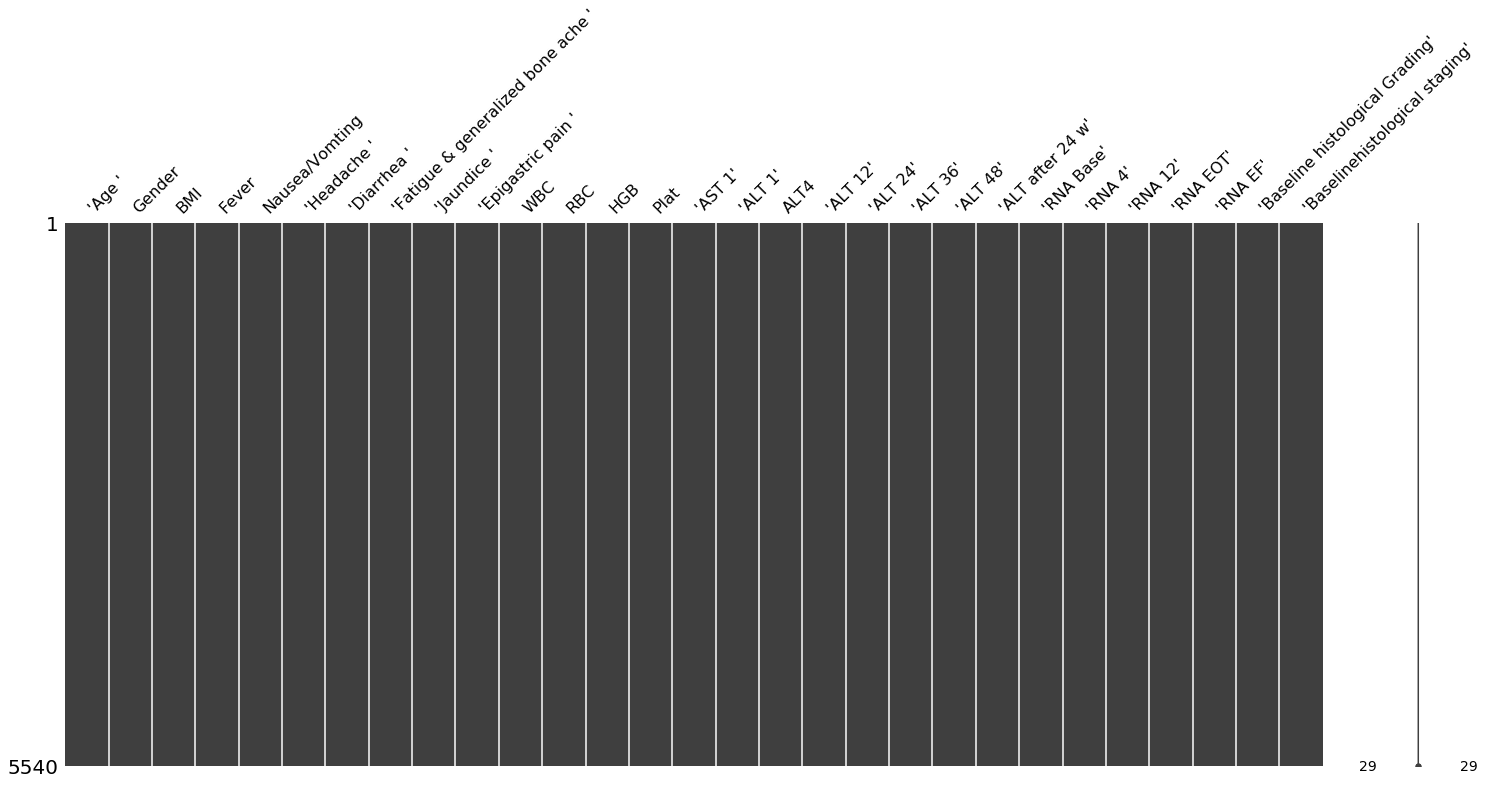

In [25]:
import missingno as msno
msno.matrix(df1)
plt.show()

In [26]:
df1.duplicated().sum()

0

In [27]:
df1.columns

Index([''Age '', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', ''Headache '',
       ''Diarrhea '', ''Fatigue & generalized bone ache '', ''Jaundice '',
       ''Epigastric pain '', 'WBC', 'RBC', 'HGB', 'Plat', ''AST 1'', ''ALT 1'',
       'ALT4', ''ALT 12'', ''ALT 24'', ''ALT 36'', ''ALT 48'',
       ''ALT after 24 w'', ''RNA Base'', ''RNA 4'', ''RNA 12'', ''RNA EOT'',
       ''RNA EF'', ''Baseline histological Grading'',
       ''Baselinehistological staging''],
      dtype='object')

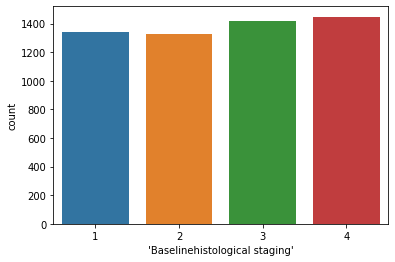

In [28]:
sns.countplot("'Baselinehistological staging'",data=df1)
plt.show()

### So we got the number of instances for classes f1,f2,f3,f4 as 1344, 1328, 1420, 1448 respectively.

In [29]:
X = df1.iloc[:,0:28]

In [30]:
y = df1.iloc[:,28]

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=18)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4432, 28)
(1108, 28)
(4432,)
(1108,)


### After spliting into test and train, we have 4432 records in train and 1108 records in test

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling for training data
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
scaled_X_train

# Scaling for test data
scaled_X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
scaled_X_test

,'Age ',Gender,BMI,Fever,Nausea/Vomting,'Headache ','Diarrhea ','Fatigue & generalized bone ache ','Jaundice ','Epigastric pain ',...,'ALT 24','ALT 36','ALT 48','ALT after 24 w','RNA Base','RNA 4','RNA 12','RNA EOT','RNA EF','Baseline histological Grading'
0,0.732525,-1.154798,1.554747,-1.208518,1.196423,1.191679,1.148875,1.186039,-1.194323,-1.164504,...,1.692496,1.884911,0.684623,-0.702614,0.621769,-0.040837,1.387291,-0.074431,0.493112,0.081368
1,1.249227,-0.993781,-0.136084,-1.129484,-0.091654,-1.171551,-0.961402,-0.961394,-1.101483,-0.708700,...,-0.927838,-0.401364,1.584063,1.592320,1.325078,0.343212,0.911898,-0.664381,-0.574296,0.265789
2,-1.376599,-0.514744,-1.378001,-0.782508,-0.248210,-0.273848,1.052932,-0.594475,0.726913,0.306525,...,1.100933,1.008651,0.263554,1.577698,0.271573,1.334380,0.494242,1.393898,1.457317,-1.349914
3,1.080785,-0.056688,-0.144978,0.105785,0.212123,-0.144610,0.778696,-0.588049,0.616862,-0.535347,...,-0.289770,1.129841,-0.102373,-0.791215,-0.428140,0.804860,0.781582,1.156151,1.158147,-0.342374
4,-1.137179,0.058633,0.573703,-1.208518,-1.140267,-0.850540,-1.185169,-0.557186,-1.132887,-0.601441,...,0.904395,0.840896,-1.797818,-1.580156,0.950834,0.577405,0.793320,1.223641,0.247680,-0.817291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,-0.587454,1.192259,-0.635973,1.144372,-1.140267,-1.171551,0.082808,1.186039,-0.360655,1.178321,...,-0.175914,0.281905,0.822901,0.896801,-0.449746,-0.794110,0.963827,-0.213539,1.646686,1.426327
1104,0.006776,-1.154798,0.414074,1.049428,1.016173,-0.476774,-1.174808,1.186039,1.169781,1.178321,...,1.060411,1.907022,0.763627,-0.318049,-0.802798,1.181531,1.264601,1.215109,1.196158,-0.484774
1105,-1.671380,-1.154798,-1.041930,-1.208518,-1.140267,1.191679,-1.185169,-1.138292,1.169781,-1.164504,...,1.378936,-1.769246,0.054132,0.441568,-1.463715,1.678668,1.423545,1.956165,-0.938342,0.081368
1106,-0.217255,-1.154798,0.498885,1.144372,-1.140267,-1.171551,1.148875,-1.138292,-0.243060,1.178321,...,1.168163,-0.494658,-0.180390,-1.373256,-0.081419,0.726146,-1.060257,-1.107944,-1.103034,0.110558


## KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(scaled_X_train, y_train) 
training_score = knn.score(scaled_X_train, y_train)
print("training accuracy:",training_score)
test_score = knn.score(scaled_X_test, y_test) 
print("test accuracy:",test_score)

training accuracy: 0.9842057761732852
test accuracy: 0.9395306859205776


In [35]:
# Classification report 
from sklearn.metrics import classification_report
y_pred_test = knn.predict(scaled_X_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           1       0.92      0.97      0.94       260
           2       0.95      0.94      0.94       265
           3       0.95      0.91      0.93       286
           4       0.94      0.94      0.94       297

    accuracy                           0.94      1108
   macro avg       0.94      0.94      0.94      1108
weighted avg       0.94      0.94      0.94      1108



In [36]:
from sklearn.model_selection import GridSearchCV
leaf_size = list(range(1,50))
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, p=p)
clf = GridSearchCV(knn, hyperparameters, cv=10)
best_model = clf.fit(scaled_X_train,y_train)
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
#Predict testing set
y_pred = best_model.predict(scaled_X_test)
#Check performance using accuracy
print(accuracy_score(y_test, y_pred))

Best leaf_size: 1
Best p: 1
0.9693140794223827


## The accuracy improved to 96.9%

In [37]:
# Classification report 
from sklearn.metrics import classification_report
y_pred_test = best_model.predict(scaled_X_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           1       0.95      0.98      0.97       260
           2       0.97      0.96      0.97       265
           3       0.99      0.96      0.97       286
           4       0.97      0.98      0.97       297

    accuracy                           0.97      1108
   macro avg       0.97      0.97      0.97      1108
weighted avg       0.97      0.97      0.97      1108



In [38]:
#confusion matrix for train data
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_test)

array([[255,   1,   0,   4],
       [  4, 254,   4,   3],
       [  5,   4, 274,   3],
       [  4,   2,   0, 291]])

## Random forest classifier

In [39]:
# importing the model class
from sklearn.ensemble import RandomForestClassifier
# creating a object for that model
rfc = RandomForestClassifier(n_estimators = 100)
# fitting the input and output of training data to the object and building the model.
rfc.fit(scaled_X_train,y_train)

RandomForestClassifier()

In [40]:
from sklearn.metrics import classification_report
y_pred_train = rfc.predict(scaled_X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1084
           2       1.00      1.00      1.00      1063
           3       1.00      1.00      1.00      1134
           4       1.00      1.00      1.00      1151

    accuracy                           1.00      4432
   macro avg       1.00      1.00      1.00      4432
weighted avg       1.00      1.00      1.00      4432



In [41]:
y_pred_test = rfc.predict(scaled_X_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           1       0.88      0.92      0.90       260
           2       0.95      0.86      0.91       265
           3       0.89      0.90      0.90       286
           4       0.90      0.92      0.91       297

    accuracy                           0.90      1108
   macro avg       0.90      0.90      0.90      1108
weighted avg       0.90      0.90      0.90      1108



In [42]:
#confusion matrix for test data
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_test)

array([[239,   3,  10,   8],
       [  9, 229,  14,  13],
       [ 15,   4, 258,   9],
       [ 10,   5,   8, 274]])

## Logistic regression

In [43]:
# importing the model class
from sklearn.linear_model import LogisticRegression
# creating a object for that model
lm = LogisticRegression()
# fitting the input and output of training data to the object and building the model.
lm.fit(scaled_X_train,y_train)

LogisticRegression()

In [44]:
# predicting the output of the training data
y_train_pred = lm.predict(scaled_X_train)
y_train_pred

array([4, 3, 1, ..., 2, 4, 1])

In [45]:
from sklearn.metrics import accuracy_score
print("Training data accuracy:",accuracy_score(y_train,y_train_pred))
log_train = accuracy_score(y_train,y_train_pred)

Training data accuracy: 0.3418321299638989


In [46]:
y_test_pred = lm.predict(scaled_X_test)
print("Testing data accuracy:",accuracy_score(y_test,y_test_pred))
log_test = accuracy_score(y_test,y_test_pred)

Testing data accuracy: 0.33393501805054154


In [47]:
knn_train = 98.4
knn_test = 96.9
ran_train = 100
ran_test = 90
log_train = 34.1
log_test = 33.3

## Comparing the three models

In [48]:
acc = {'knn_train':knn_train,'knn_test':knn_test,'RandomForest_train':ran_train,'RandomForest_test':ran_test,'log_train':log_train,'log_test':log_test}
x = acc.keys()
y = acc.values()

<BarContainer object of 6 artists>

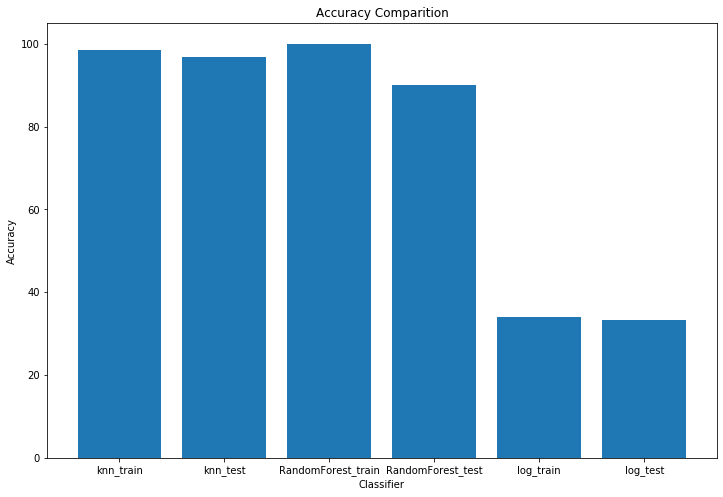

In [49]:
plt.figure(figsize=(12,8))
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparition")
plt.bar(list(x),list(y))

## Knn performed better with an accuracy of 96.9 %

## Now comparing before and after smote results

In [50]:
knn1_train = 61
knn1_test = 21
ran1_train = 100
ran1_test = 26

In [51]:
acc = {'knn_train before':knn1_train,'knn_train after ':knn_train,'knn_test before':knn1_train,'knn_test after ':knn_test,'RandomForest_train before':ran1_train,'RandomForest_train after':ran_train,'RandomForest_test before':ran1_test,'RandomForest_test after':ran_test}
x = acc.keys()
y = acc.values()

<BarContainer object of 8 artists>

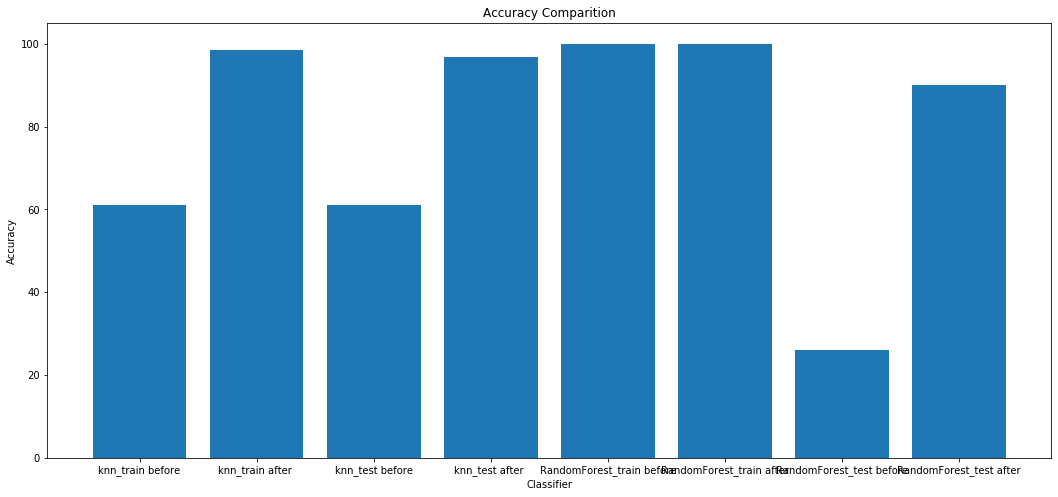

In [52]:
plt.figure(figsize=(18,8))
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparition")
plt.bar(list(x),list(y))

## So, we have successfully classified the stage of hcv infected patient with an accuracy of around 97% by using KNN classifier algorithm.